## Fine Tuning

In this notebook, we will fine-tune the model created in the previous notebook. This process involves unfreezing a few of the top layers of the convolutional base used for feature creation and then training the whole model along with the dense classifier on top.

In [1]:
from keras.models import load_model


model = load_model('cats_and_dogs_small_4.h5') 

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [3]:
conv_base = model.get_layer('vgg16')
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
conv_base.trainable = True

for layer in conv_base.layers:
    if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv2']:
        layer.trainable = True
    else:
        layer.trainable = False

In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
2359808 * 2

4719616

## Import, Directory Paths

In [7]:
import os
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers


base_dir = './'

train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')                           

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')          

## Image Data Generators

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Model Compliation and Training

In [9]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-5), 
              metrics=['acc'])


history = model.fit(
    train_generator, 
    steps_per_epoch=100, 
    epochs=50, 
    validation_data=validation_generator, 
    validation_steps=50)

Epoch 1/50
100/100 [==============================] - 505s 5s/step - loss: 0.3043 - acc: 0.8690 - val_loss: 0.2360 - val_acc: 0.9060
Epoch 2/50
100/100 [==============================] - 494s 5s/step - loss: 0.2783 - acc: 0.8815 - val_loss: 0.2062 - val_acc: 0.9190
Epoch 3/50
100/100 [==============================] - 491s 5s/step - loss: 0.2736 - acc: 0.8725 - val_loss: 0.2130 - val_acc: 0.9150
Epoch 4/50
100/100 [==============================] - 500s 5s/step - loss: 0.2397 - acc: 0.8935 - val_loss: 0.2295 - val_acc: 0.9080
Epoch 5/50
100/100 [==============================] - 488s 5s/step - loss: 0.2347 - acc: 0.8995 - val_loss: 0.1953 - val_acc: 0.9240
Epoch 6/50
100/100 [==============================] - 491s 5s/step - loss: 0.2145 - acc: 0.9095 - val_loss: 0.2299 - val_acc: 0.9070
Epoch 7/50
100/100 [==============================] - 504s 5s/step - loss: 0.2007 - acc: 0.9215 - val_loss: 0.2236 - val_acc: 0.9220
Epoch 8/50
100/100 [==============================] - 496s 5s/step - 

## Training and Validation Accuracy

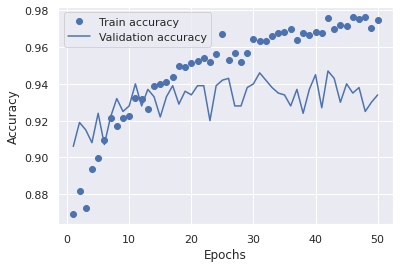

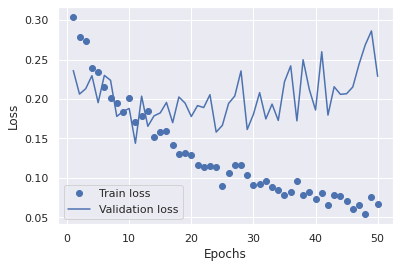

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


epochs = range(1, len(history.history['loss']) + 1)
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, '-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
model.save('cats_and_dogs_small_5.h5')

## Test Accuracy

In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 149s 3s/step - loss: 0.2485 - acc: 0.9390
test acc: 0.9390000104904175
